In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# example of using ImageDataGenerator to standardize images
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, Convolution2D
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
# load dataset
(trainX, trainY), (testX, testY) = mnist.load_data()
# reshape dataset to have a single channel
width, height, channels = trainX.shape[1], trainX.shape[2], 1
trainX = trainX.reshape((trainX.shape[0], width, height, channels))
testX = testX.reshape((testX.shape[0], width, height, channels))
trainX = trainX.astype('float32')
testX = testX.astype('float32')
trainX /= 255
testX /= 255
# one hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)
# create generator to standardize images
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# calculate mean on training dataset
datagen.fit(trainX)
# prepare an iterators to scale images
train_iterator = datagen.flow(trainX, trainY, batch_size=512, shuffle=False)
test_iterator = datagen.flow(testX, testY, batch_size=512, shuffle=False)
print('Batches train=%d, test=%d' % (len(train_iterator), len(test_iterator)))


Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step
Batches train=118, test=20


In [3]:
# define model
model = Sequential()

model.add(Convolution2D(10, 3, 3, kernel_regularizer=regularizers.l2(0.01), input_shape=(28,28,1))) # 26 3X3
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(16, 3, 3, kernel_regularizer=regularizers.l2(0.01))) # 24 5X5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(16, 3, 3 , kernel_regularizer=regularizers.l2(0.01))) # 22 7X7
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(10, 3, 3 , kernel_regularizer=regularizers.l2(0.01))) # 20 9X9
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(16, 3, 3 , kernel_regularizer=regularizers.l2(0.01))) # 18 11X11
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(0.025))

model.add(MaxPooling2D(pool_size=(2, 2))) # 9 22X22
model.add(Convolution2D(10, 1, 1 , kernel_regularizer=regularizers.l2(0.01))) #  7 24X24
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(16, 3, 3 , kernel_regularizer=regularizers.l2(0.01))) # 5 26X26
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(16, 3, 3 , kernel_regularizer=regularizers.l2(0.01))) #  3 28X28
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.025))


model.add(Convolution2D(16, 3, 3 , kernel_regularizer=regularizers.l2(0.01))) 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(10, 1 , kernel_regularizer=regularizers.l2(0.01))) 
model.add(Activation('relu'))

model.add(Convolution2D(10, 3 , kernel_regularizer=regularizers.l2(0.01)))
model.add(Flatten())
model.add(Activation('softmax'))





Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), kernel_regularizer=<keras.reg..., input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg...)`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg...)`
  # Remove the CWD from sys.path while we load stuff.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), kernel_regularizer=<keras.reg...)`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg...)`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.p

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 16)        2320      
__________

In [0]:
def scheduler(epoch, lr):
  return round(0.007 * 1/(1 + 0.121 * epoch), 10)

In [0]:
from keras import optimizers
from keras.callbacks import ModelCheckpoint, LearningRateScheduler

In [0]:
adam = optimizers.Adam(lr=0.007)

In [0]:
# compile model
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
filepath="/content/drive/My Drive/EVA-Assignment-5-weights/EVA-Assignment-5-weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', save_best_only=True,verbose=1,save_weights_only=True,period=1,mode='max')
callbacks_list = [checkpoint]

In [11]:
# fit model with generator
model.fit_generator(train_iterator, steps_per_epoch=512, epochs=40, verbose=1,callbacks=[checkpoint,LearningRateScheduler(scheduler)],validation_data=test_iterator,validation_steps=512, shuffle=True)
# evaluate model

Instructions for updating:
Use tf.cast instead.
Epoch 1/40
512/512 [==============================] - 27s 53ms/step - loss: 0.4525 - acc: 0.9532 - val_loss: 3.3344 - val_acc: 0.3716

Epoch 00001: val_acc improved from -inf to 0.37160, saving model to /content/drive/My Drive/EVA-Assignment-5-weights/EVA-Assignment-5-weights.hdf5
Epoch 2/40
512/512 [==============================] - 22s 42ms/step - loss: 0.2278 - acc: 0.9757 - val_loss: 0.3098 - val_acc: 0.9494

Epoch 00002: val_acc improved from 0.37160 to 0.94937, saving model to /content/drive/My Drive/EVA-Assignment-5-weights/EVA-Assignment-5-weights.hdf5
Epoch 3/40
512/512 [==============================] - 22s 43ms/step - loss: 0.2010 - acc: 0.9778 - val_loss: 0.3673 - val_acc: 0.9260

Epoch 00003: val_acc did not improve from 0.94937
Epoch 4/40
512/512 [==============================] - 22s 43ms/step - loss: 0.1778 - acc: 0.9790 - val_loss: 0.2896 - val_acc: 0.9412

Epoch 00004: val_acc did not improve from 0.94937
Epoch 5/40
512/

In [0]:
model.load_weights("/content/drive/My Drive/EVA-Assignment-5-weights/EVA-Assignment-5-weights.hdf5") ## Load the weights that gave highest validation accuracy

In [13]:
stats = model.evaluate_generator(test_iterator, steps=512,  max_queue_size=10, workers=1, use_multiprocessing=False, verbose=1) ## get loass, accuracy 

512/512 [==============================] - 5s 10ms/step


In [14]:
print("Loss, Accuracy = ", stats)

Loss, Accuracy =  [0.08865750582330419, 0.988366731177334]


In [0]:
import pandas as pd
import numpy

In [0]:
predictions = model.predict_generator(datagen.flow(testX, testY, batch_size=512, shuffle = False), steps = numpy.ceil(testX.shape[0]/512)) ## predict using model

In [0]:
predicted = numpy.argmax(predictions, axis = 1) ## create a 1-d array of predicted test values

In [40]:
predicted

array([7, 2, 1, ..., 4, 5, 6])

In [0]:
actual = numpy.argmax(testY, axis = 1) ## create 1-d arra of original test values

In [42]:
actual

array([7, 2, 1, ..., 4, 5, 6])

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
cm = confusion_matrix(actual, predicted) ## create confusion matrix

In [45]:
cm

array([[ 972,    1,    1,    0,    1,    0,    2,    1,    1,    1],
       [   0, 1133,    0,    0,    0,    2,    0,    0,    0,    0],
       [   1,    0, 1025,    0,    1,    0,    4,    1,    0,    0],
       [   0,    1,    3, 1004,    0,    1,    0,    0,    1,    0],
       [   0,    0,    0,    0,  975,    0,    0,    0,    4,    3],
       [   1,    0,    0,   12,    0,  870,    5,    1,    2,    1],
       [   3,    4,    0,    0,    3,    1,  945,    0,    2,    0],
       [   0,    7,   14,    0,    0,    0,    0, 1006,    0,    1],
       [   4,    2,    2,    1,    0,    1,    1,    0,  961,    2],
       [   1,    0,    2,    0,    8,    1,    0,    3,    2,  992]])

In [0]:
full_df = pd.DataFrame(data = {'predicted': predicted, 'actual': actual}) ## create a dataframe 

In [47]:
full_df.shape

(10000, 2)

In [48]:
full_df.dtypes

predicted    int64
actual       int64
dtype: object

In [49]:
full_df

,predicted,actual
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,6,5
9,9,9


In [0]:
misclassified = full_df[(full_df.predicted != full_df.actual)] ## dataframe that contains misclassified images

In [51]:
misclassified ## list misclassified images

,predicted,actual
8,6,5
266,0,8
412,3,5
445,0,6
495,0,8
582,2,8
625,4,6
646,6,2
846,9,7
947,9,8


In [53]:
misclassified.actual.head(25)

8       5
266     8
412     5
445     6
495     8
582     8
625     6
646     2
846     7
947     8
1014    6
1032    5
1114    3
1119    7
1232    9
1247    9
1260    7
1299    5
1337    2
1378    5
1393    5
1414    9
1500    7
1520    7
1527    1
Name: actual, dtype: int64

In [54]:
misclassified.shape

(117, 2)

In [0]:
proper_classified = full_df[(full_df.predicted == full_df.actual)]

In [56]:
proper_classified

,predicted,actual
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
9,9,9
10,0,0


In [0]:
!pip install --upgrade --upgrade-strategy only-if-needed https://github.com/faizanahemad/data-science-utils/tarball/master > /dev/null

In [0]:
from data_science_utils.vision.keras import *

In [0]:
X_train, Y_train, X_test, Y_test = get_mnist_data()

In [0]:
from matplotlib import pyplot as plt
%matplotlib inline

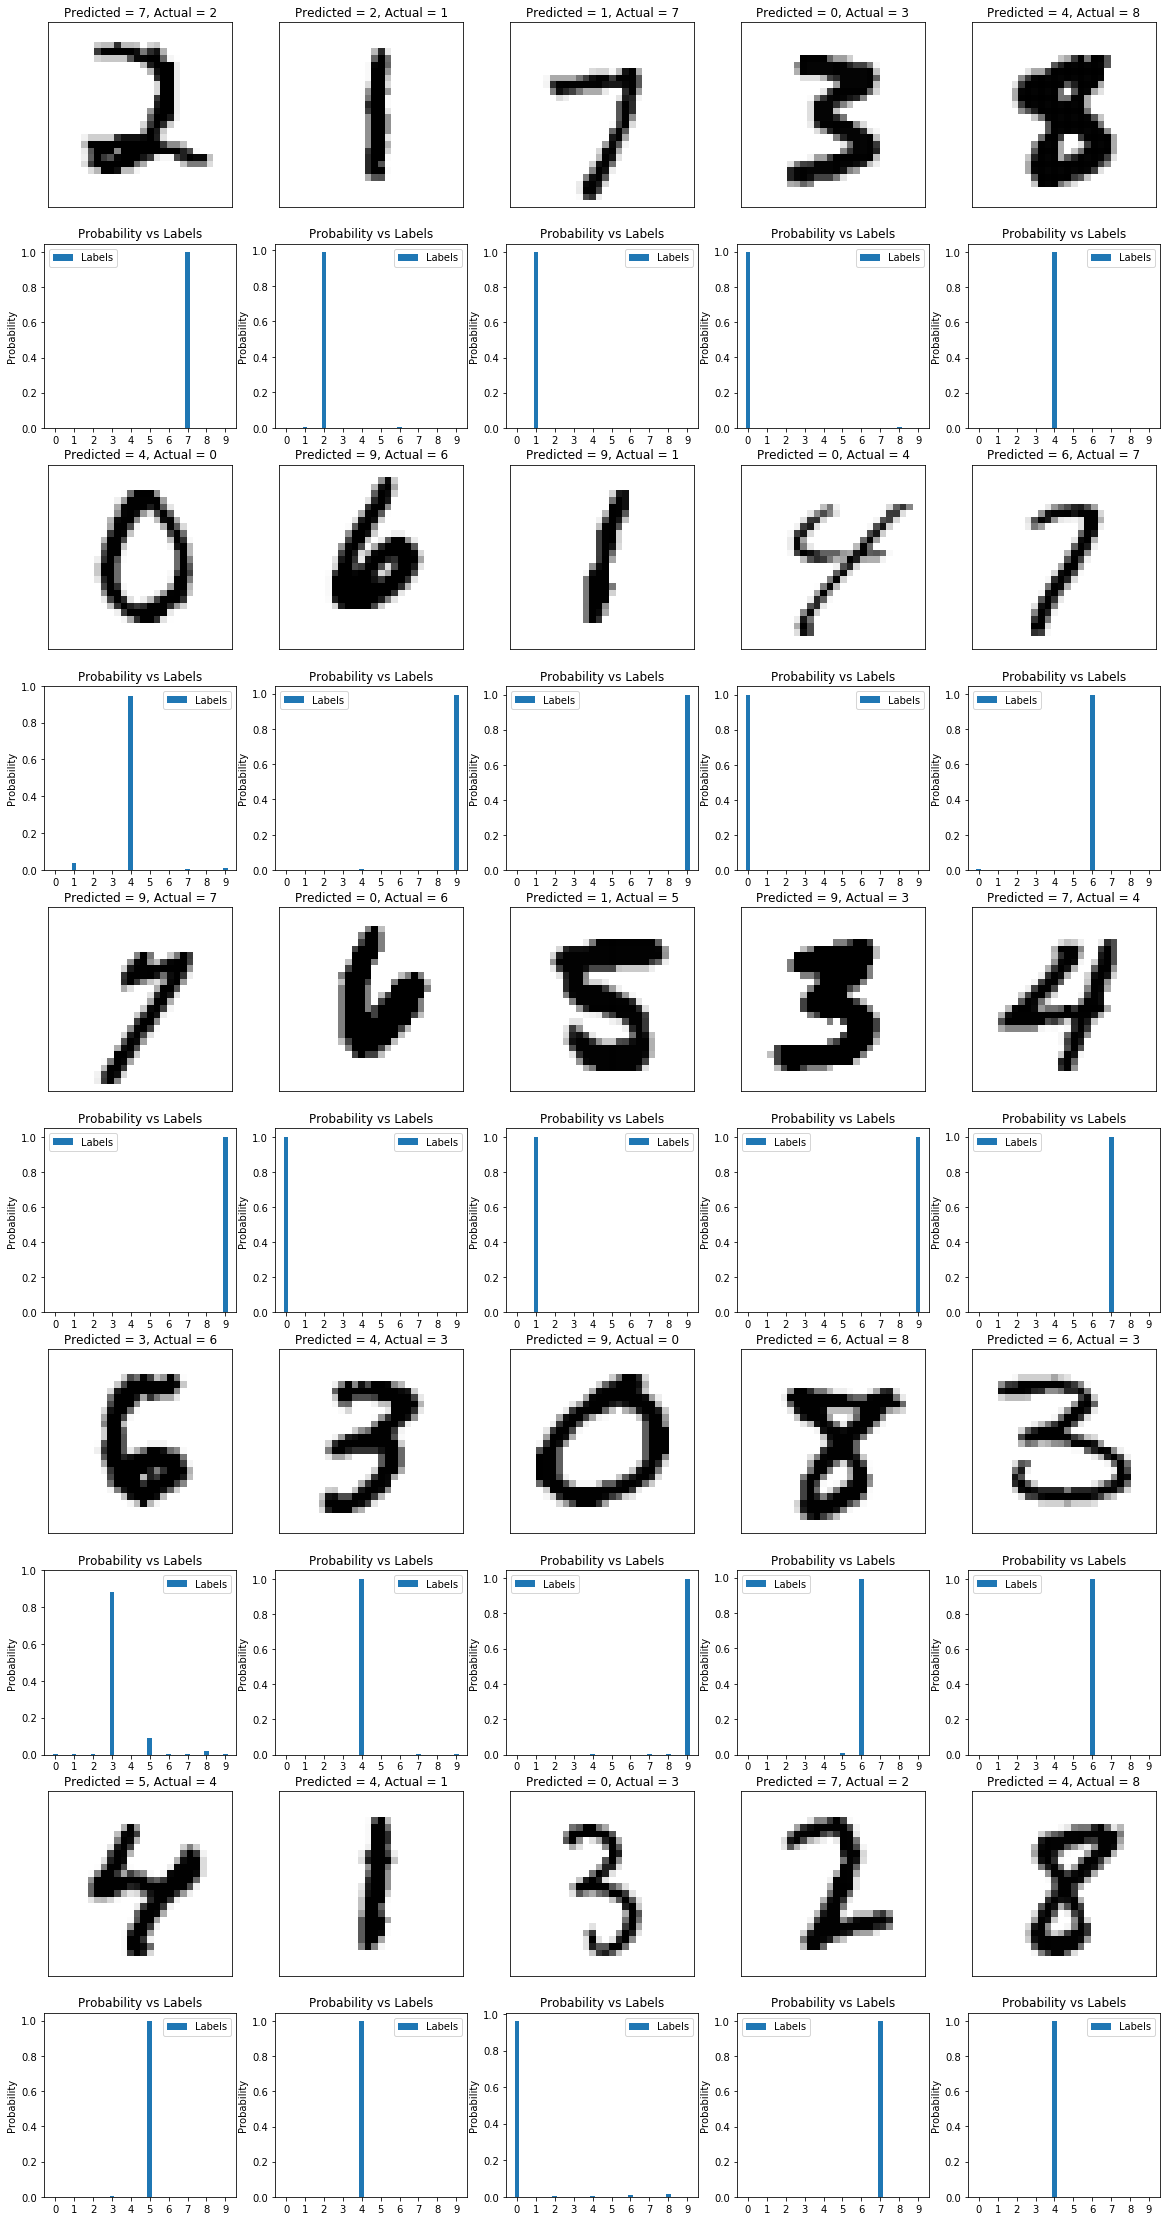

In [62]:
## print the misclassified images

show_misclassified(X_test, Y_test, predictions[:len(Y_test)], classes=get_mnist_labels(), 
                       columns=5, total=25, 
                       pick_randomly=False, image_size_multiplier=4)